<a href="https://colab.research.google.com/github/Kanak17/HumanActivityDetectionWithSmartPhones/blob/main/Human_Activity_Recognition_project_week3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<B><H1> Human Activity Recognition Project<B>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE

In [15]:
train = pd.read_csv("/content/test.csv")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [16]:
train.shape

(2947, 563)

In [17]:
test = pd.read_csv('/content/train.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [18]:
train.shape


(2947, 563)

*italicized text*<H2> Data Cleaning <H2>

In [19]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [20]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [21]:
#check for data imbalance

In [22]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

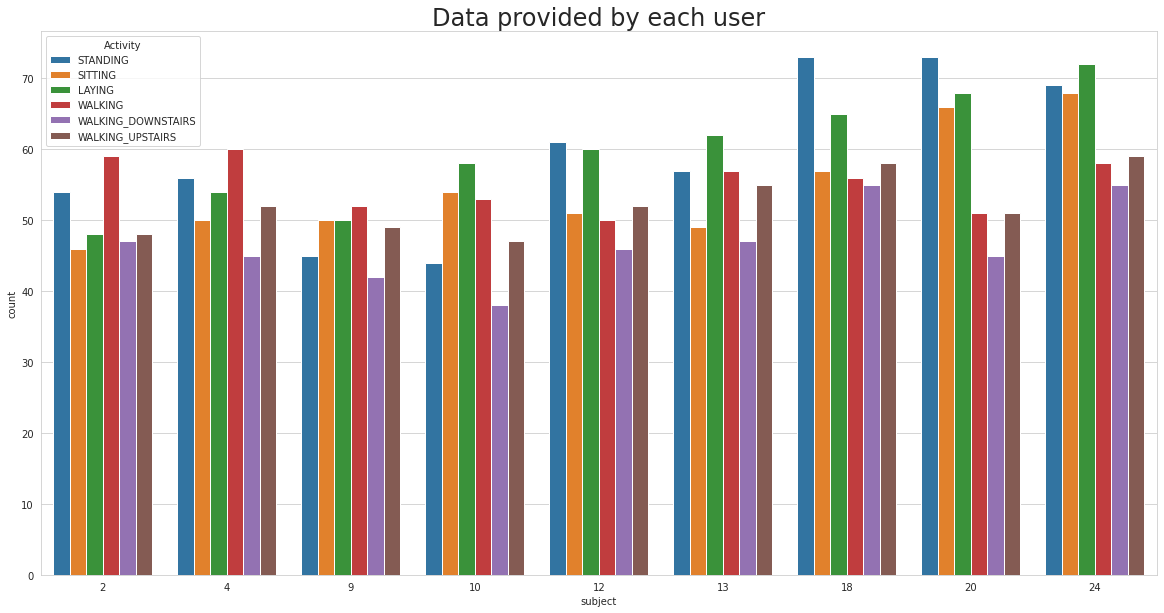

In [23]:
plt.figure(figsize =(20,10))
plt.title('Data provided by each user',fontsize=24)
sns.countplot(x='subject',hue='Activity',data=train)
plt.show()

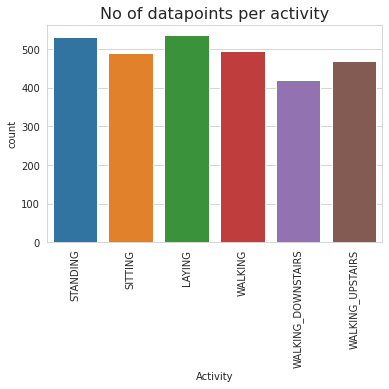

In [24]:
plt.title('No of datapoints per activity',fontsize=16)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

In [25]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [26]:
columns = train.columns

#Removing '()' from column names

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

train.columns
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [27]:
train.to_csv('f_train.csv',index=False)
test.to_csv('f_test.csv',index=False)

<B><H2> Exploratory Data Analysis<H2><B>
    
    Feature Engineering

`1.` <b>Static and Dynamic Activities<b>

`-->`Static Activities --> sit,stand,lie down

`-->`Dynamic Activities --> Walking, Walking_upstairs,Walking_upstairs


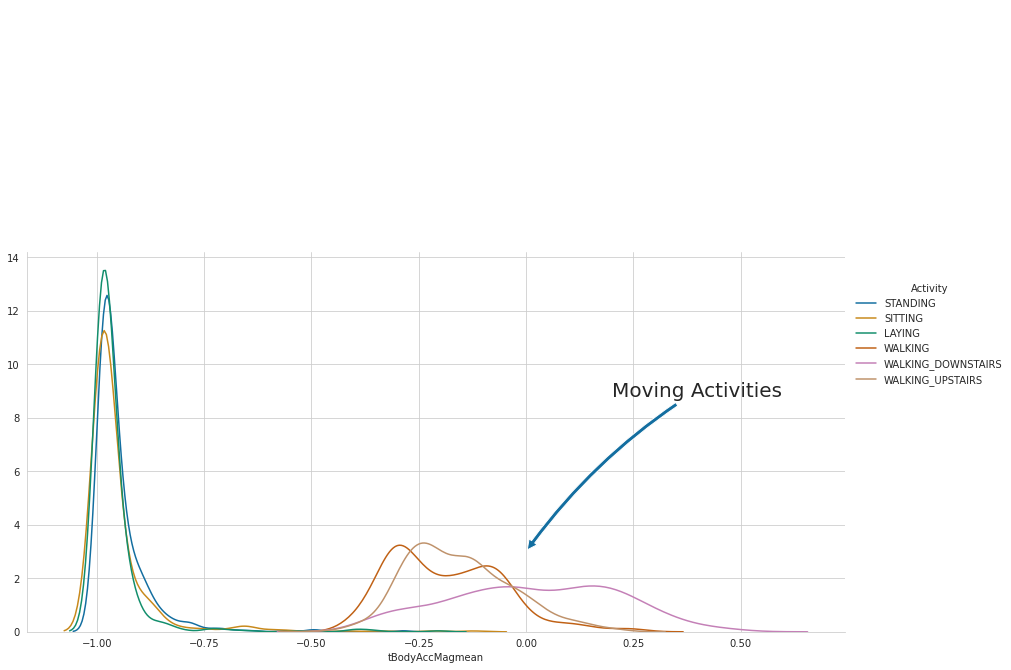

In [28]:
sns.set_palette("colorblind", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()


plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops= dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))


plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops= dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

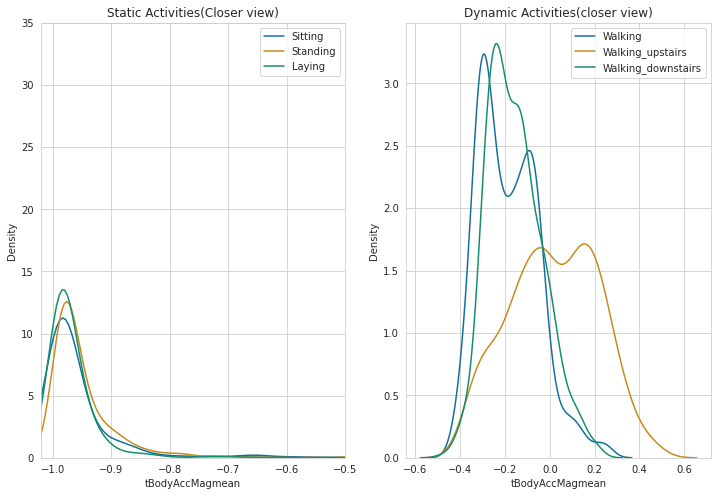

In [29]:
# For plotting purposes taking datapoints of each activity to a different dataframes


df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)

plt.title("Static Activities(Closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False ,label = 'Sitting')

sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False ,label = 'Standing')

sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False ,label = 'Laying')

plt.legend()


plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)

plt.title("Dynamic Activities(closer view)")

sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False ,label = 'Walking')

sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False ,label = 'Walking_upstairs')

sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False ,label = 'Walking_downstairs')

plt.legend()

<h3>3.  Magnitude of an acceleration can separate it well<h3>




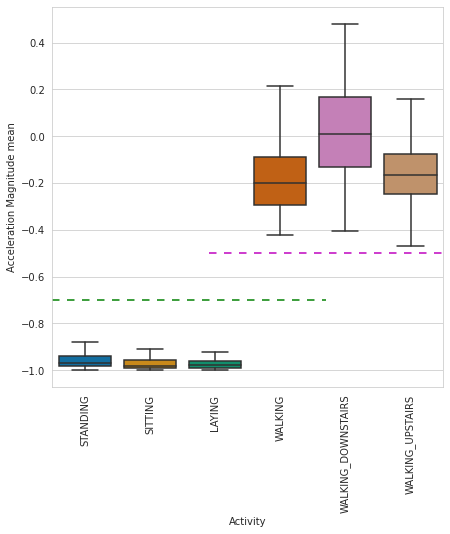

In [30]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity',y='tBodyAccMagmean',data=train,showfliers = False ,saturation=1)

plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7,xmin=0.0,xmax=0.7,dashes=(5,5),c='g')
plt.axhline(y=-0.5,xmin=0.4,dashes=(5,5),c='m')
plt.xticks(rotation=90)
plt.show()


<h2> Observation <h3>
    
-->If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
                        
-->If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
    
-->If tAccMean > 0.0 then the Activity is WalkingDownstairs.
    
-->We can classify 75% the Acitivity labels with some errors.

<h4>4. Position of GravityAccelerationComponants also matters <h4>

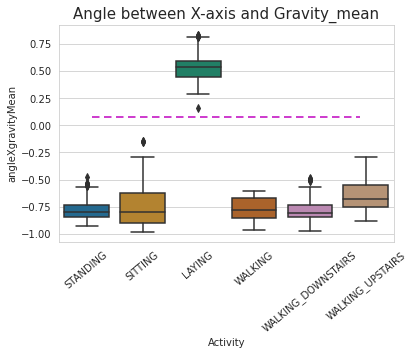

In [31]:
sns.boxplot(x='Activity',y='angleXgravityMean',data=train)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,c='m',dashes=(5,3))
plt.title("Angle between X-axis and Gravity_mean",fontsize=15)
plt.xticks(rotation=40)
plt.show()

<h3>Observations:<h3>

If angleX,gravityMean > 0 then Activity is Laying.
    
We can classify all datapoints belonging to Laying activity with just a single if else statement.

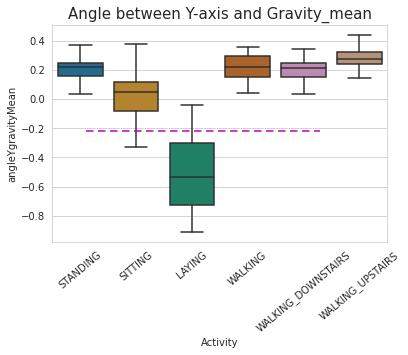

In [32]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

<h3>Observations:<h3>

If angleYgravityMean < -0.2 then Activity is Laying.
    
We can classify all datapoints belonging to Laying activity with just a single if else statement.

**bold text**<H2> Apply t-sne on the data<H2>

Here we will see these datapoints in 2 dimensions and try to observe the behaviour of the datapoints

In [33]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=3000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 3000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.138s...
[t-SNE] Computed neighbors for 2947 samples in 5.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 1.049178
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 102.9398956, gradient norm = 0.0699056 (50 iterations in 1.317s)
[t-SNE] Iteration 100: error = 87.9413605, gradient norm = 0.0581636 (50 iterations in 0.710s)
[t-SNE] Iteration 150: error = 83.8819351, gradient norm = 0.0410629 (50 iterations in 0.588s)
[t-SNE] Iteration 200: error = 81.8900909, gradient norm = 0.0315696 (50 iterations in 0.604s)
[t-SNE] Iteration 250: error = 80.7575073, gradient norm = 0.0280003 (50 iterations in 0.585s)
[t-SNE] KL divergence after 250 itera

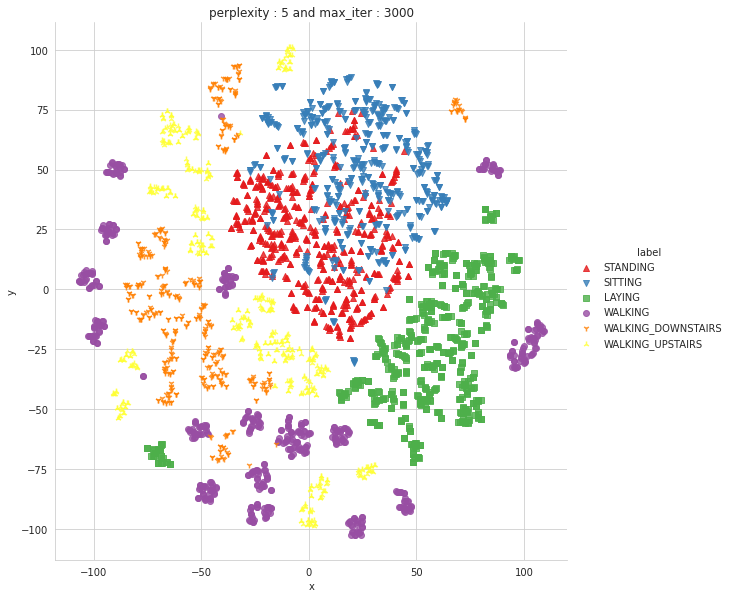

Done

performing tsne with perplexity 10 and with 3000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.158s...
[t-SNE] Computed neighbors for 2947 samples in 5.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 1.245289
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 92.6603394, gradient norm = 0.1091133 (50 iterations in 1.329s)
[t-SNE] Iteration 100: error = 80.4625702, gradient norm = 0.0375449 (50 iterations in 0.714s)
[t-SNE] Iteration 150: error = 78.3313141, gradient norm = 0.0226164 (50 iterations in 0.592s)
[t-SNE] Iteration 200: error = 77.4271545, gradient norm = 0.0144212 (50 iterations in 0.593s)
[t-SNE] Iteration 250: error = 76.6216278, gradient norm = 0.0162948 (50 iterations in 0.597s)
[t-SNE] KL divergence after 250 

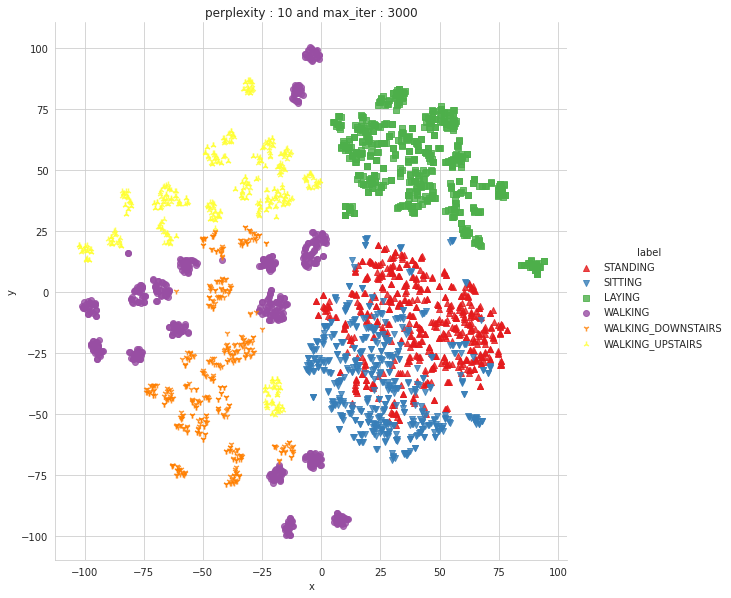

Done

performing tsne with perplexity 20 and with 3000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.164s...
[t-SNE] Computed neighbors for 2947 samples in 5.994s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 1.411132
[t-SNE] Computed conditional probabilities in 0.087s
[t-SNE] Iteration 50: error = 83.6496277, gradient norm = 0.1377510 (50 iterations in 1.374s)
[t-SNE] Iteration 100: error = 74.9380341, gradient norm = 0.0231488 (50 iterations in 0.943s)
[t-SNE] Iteration 150: error = 73.5773163, gradient norm = 0.0162512 (50 iterations in 0.817s)
[t-SNE] Iteration 200: error = 73.0518341, gradient norm = 0.0104371 (50 iterations in 0.784s)
[t-SNE] Iteration 250: error = 72.7445221, gradient norm = 0.0120991 (50 iterations in 0.764s)
[t-SNE] KL divergence after 250 

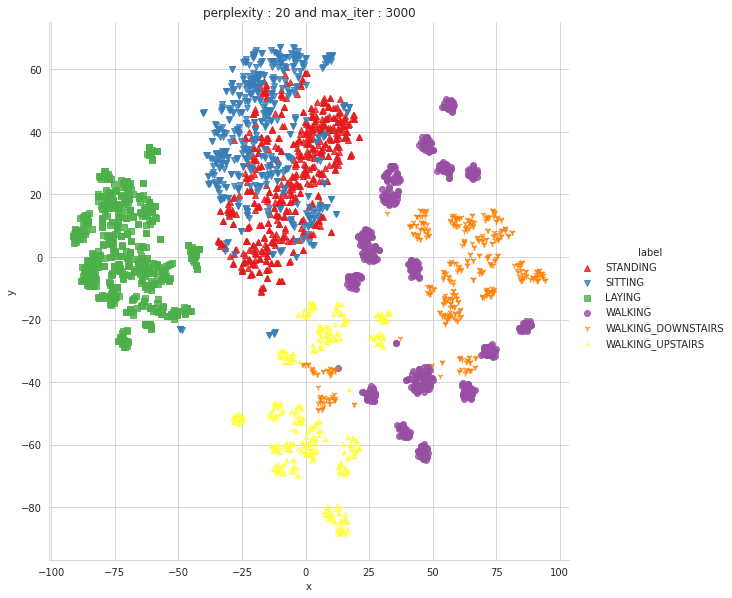

Done

performing tsne with perplexity 30 and with 3000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.164s...
[t-SNE] Computed neighbors for 2947 samples in 6.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 1.499488
[t-SNE] Computed conditional probabilities in 0.144s
[t-SNE] Iteration 50: error = 79.2929306, gradient norm = 0.0948759 (50 iterations in 1.462s)
[t-SNE] Iteration 100: error = 71.4755402, gradient norm = 0.0262374 (50 iterations in 1.073s)
[t-SNE] Iteration 150: error = 70.3623199, gradient norm = 0.0096106 (50 iterations in 0.957s)
[t-SNE] Iteration 200: error = 69.9821167, gradient norm = 0.0090077 (50 iterations in 0.921s)
[t-SNE] Iteration 250: error = 69.7807922, gradient norm = 0.0081375 (50 iterations in 0.900s)
[t-SNE] KL divergence after 250 

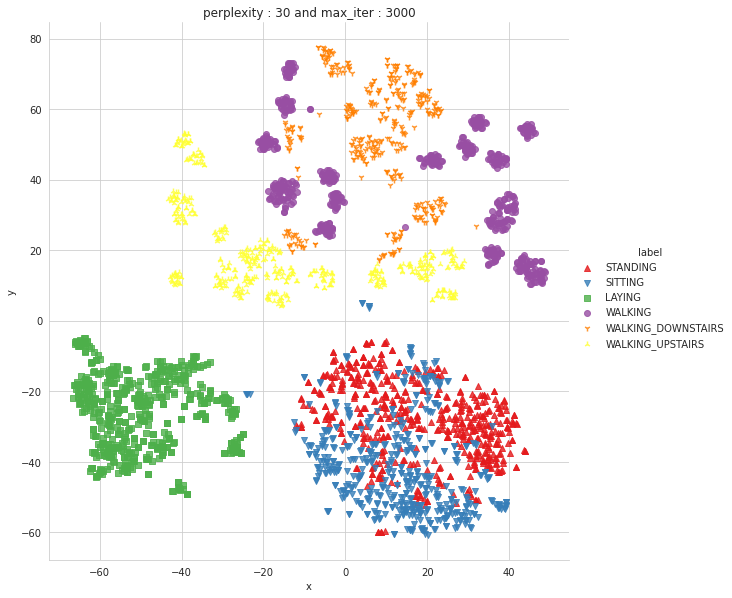

Done

performing tsne with perplexity 50 and with 3000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.188s...
[t-SNE] Computed neighbors for 2947 samples in 6.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 1.608102
[t-SNE] Computed conditional probabilities in 0.224s
[t-SNE] Iteration 50: error = 72.2138748, gradient norm = 0.1058013 (50 iterations in 1.954s)
[t-SNE] Iteration 100: error = 65.9808655, gradient norm = 0.0210444 (50 iterations in 1.085s)
[t-SNE] Iteration 150: error = 65.4511108, gradient norm = 0.0113414 (50 iterations in 1.041s)
[t-SNE] Iteration 200: error = 65.2495804, gradient norm = 0.0064156 (50 iterations in 1.039s)
[t-SNE] Iteration 250: error = 65.1399460, gradient norm = 0.0045293 (50 iterations in 1.062s)
[t-SNE] KL divergence after 250

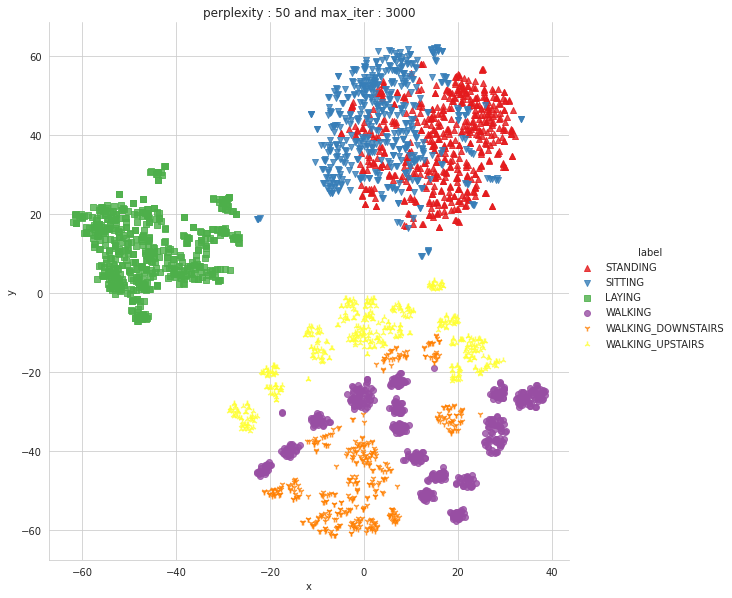

Done


In [34]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20,30,50])



```
# This is formatted as code
```

<H2>Modeling with logistic regression and linear SVC

In [35]:
from sklearn.model_selection import train_test_split

y = train.Activity
X = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X.shape)
print('Test data size : ', X_test.shape)

Training data size :  (2947, 561)
Test data size :  (7352, 561)


In [36]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn import metrics

In [38]:
train['Activity'].groupby(train['Activity']).count()


Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
Name: Activity, dtype: int64

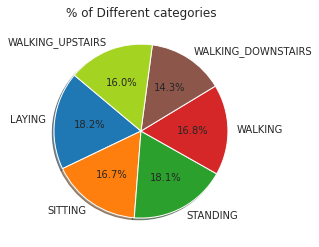

In [39]:
activity = train['Activity'].groupby(train['Activity']).count().index
activity_data = train['Activity'].groupby(train['Activity']).count().values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#a4d321"]
plt.pie(activity_data, labels=activity,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

**Function to plot the confusion matrix**

In [40]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Defining a Generic function to run any specified model**

In [41]:
from datetime import datetime

def perform_model(model, X, y, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X, y)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

**Method to print the gridsearch attributes**

In [42]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))



**1.Logistic Regression with Gridsearch**

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:09.482373


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.032250


---------------------
|      Accuracy      |
---------------------

    0.934031556039173


--------------------
| Confusion Matrix |
--------------------

 [[1405    0    0    0    2    0]
 [  21 1177   87    0    0    1]
 [   0  157 1217    0    0    0]
 [   0    0    1 1122   10   93]
 [   0    0    0   17  939   30]
 [   0    0    0    6   60 1007]]


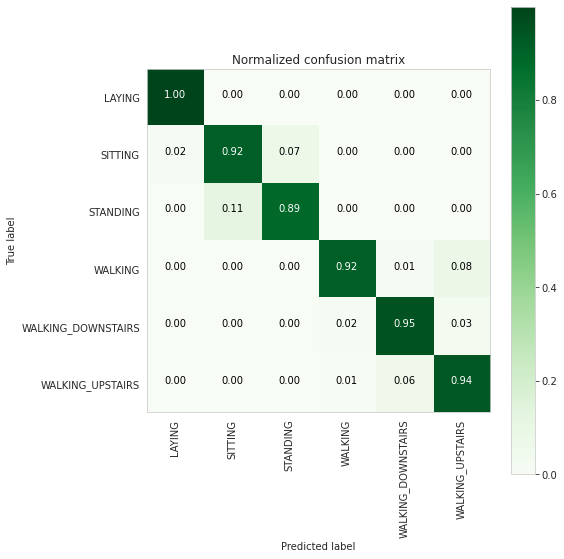

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99      1407
           SITTING       0.88      0.92      0.90      1286
          STANDING       0.93      0.89      0.91      1374
           WALKING       0.98      0.92      0.95      1226
WALKING_DOWNSTAIRS       0.93      0.95      0.94       986
  WALKING_UPSTAIRS       0.89      0.94      0.91      1073

          accuracy                           0.93      7352
         macro avg       0.93      0.93      0.93      7352
      weighted avg       0.94      0.93      0.93      7352



In [43]:
from sklearn import linear_model
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X, y, X_test, y_test,labels)

In [44]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9375628039191718



**2.Linear SVC with GridSearch**

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:33.683162


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.022948


---------------------
|      Accuracy      |
---------------------

    0.9423286180631121


--------------------
| Confusion Matrix |
--------------------

 [[1404    2    0    0    1    0]
 [   3 1191   91    0    0    1]
 [   0  153 1221    0    0    0]
 [   0    0    0 1138    5   83]
 [   0    0    0   12  952   22]
 [   0    0    0    4   47 1022]]


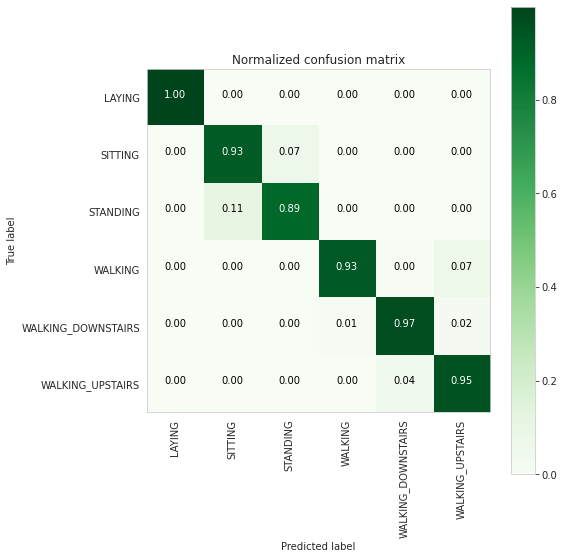

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1407
           SITTING       0.88      0.93      0.91      1286
          STANDING       0.93      0.89      0.91      1374
           WALKING       0.99      0.93      0.96      1226
WALKING_DOWNSTAIRS       0.95      0.97      0.96       986
  WALKING_UPSTAIRS       0.91      0.95      0.93      1073

          accuracy                           0.94      7352
         macro avg       0.94      0.94      0.94      7352
      weighted avg       0.94      0.94      0.94      7352



In [45]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X, y, X_test, y_test, class_labels=labels)

In [46]:
print_grid_search_attributes(lr_svc_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9267238352853155



In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
import time

In [48]:

x = train.drop(['Activity'],axis=1)
y = train['Activity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [49]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    RidgeClassifier(),
    LogisticRegression(max_iter=200)
]

In [50]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

<H4> Accuracy for train data

In [51]:
f_score(X_train, X_test, y_train, y_test)


Score: 0.971 	 Time(in secs): 1.108 	 Classifier: KNeighborsClassifier
Score: 0.981 	 Time(in secs): 1.455 	 Classifier: SVC
Score: 0.945 	 Time(in secs): 0.976 	 Classifier: DecisionTreeClassifier
Score: 0.984 	 Time(in secs): 2.632 	 Classifier: RandomForestClassifier
Score: 0.753 	 Time(in secs): 0.032 	 Classifier: GaussianNB
Score: 0.99 	 Time(in secs): 0.083 	 Classifier: RidgeClassifier
Score: 0.995 	 Time(in secs): 1.646 	 Classifier: LogisticRegression


<H4> Accuracy for test data

In [52]:
#df_test = pd.read_csv("test.csv")
df_test_x = test.drop(['Activity'],axis=1)
df_test_y = test['Activity']
f_score(x, df_test_x, y, df_test_y)

Score: 0.836 	 Time(in secs): 6.909 	 Classifier: KNeighborsClassifier
Score: 0.882 	 Time(in secs): 10.879 	 Classifier: SVC
Score: 0.854 	 Time(in secs): 1.237 	 Classifier: DecisionTreeClassifier
Score: 0.91 	 Time(in secs): 3.578 	 Classifier: RandomForestClassifier
Score: 0.695 	 Time(in secs): 0.185 	 Classifier: GaussianNB
Score: 0.935 	 Time(in secs): 0.239 	 Classifier: RidgeClassifier
Score: 0.936 	 Time(in secs): 2.184 	 Classifier: LogisticRegression
